# Eye Behaviour During an Imitation Task

## Abstract
(TODO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

plt.style.use('dark_background')
sea.set_context('poster')

## Contents
- [Task Introduction](#task_intro)
- [Validating Dataset](#dataset_intro)
    - [Eye Data](#dataset_eye)
    - [Accelerometer Data](#dataset_acc)

## Task Introduction <a name="task_intro"></a>
TODO: We need to explain and use an image to describe the task.

## Validating Dataset <a name="dataset_intro"></a>

### Eye Data <a name="dataset_eye"></a>
We check gaze behaviour from data already processed. Each row represents a gaze event at
some time/some place/some guy, these events can be __fixations__, __saccades__ or __smooth pursuit__.

In [2]:
df_raw = pd.read_csv('./data/eye_data.csv')
df_eye = df_raw.copy()  # this way we have always the original dataset imported
df_eye.head()

,Unnamed: 0,Unnamed: 0.1,time_start,time_end,x_start,y_start,x_end,y_end,distance,duration,...,velocity2,var0,var1,var2,type,subject,trial_id,x0_resized,y0_resized,roi
0,0,0,0.24732,0.31506,13.931,-77.964,18.419,-77.736,3.8390,0.067738,...,38.0030,0.0,0,0,1,1,-1.0,557,3886,0.0
1,1,1,0.44706,0.47904,20.301,-77.300,19.992,-77.527,3.2738,0.031988,...,6.8612,0.0,0,0,1,1,-1.0,812,3862,0.0
2,2,2,0.74706,0.77907,14.319,-79.874,14.656,-78.514,4.6463,0.032007,...,25.0750,0.0,0,0,1,1,-1.0,572,3955,0.0
3,3,3,2.04710,2.11110,28.586,-77.038,23.668,-82.696,6.1460,0.064084,...,67.0000,0.0,0,0,1,1,-1.0,1143,3853,0.0
4,4,4,2.17910,2.24710,21.846,-85.077,20.806,-87.076,2.8370,0.067986,...,18.9890,0.0,0,0,1,1,-1.0,873,4142,0.0


First, let's exclude the Unnamed columns:

In [3]:
for a_column in df_eye.columns:
    if 'Unnamed' in a_column:
        print(f'dropping {a_column}')
        df_eye.drop(a_column, axis=1, inplace=True)

dropping Unnamed: 0
dropping Unnamed: 0.1


Second, let's transform __trial_id__ and __roi__ to integer:

In [4]:
df_eye['trial_id'] = df_eye['trial_id'].astype('int')
df_eye['roi'] = df_eye['roi'].astype('int')

In [5]:
# check final result
df_eye.head()

,time_start,time_end,x_start,y_start,x_end,y_end,distance,duration,velocity1,velocity2,var0,var1,var2,type,subject,trial_id,x0_resized,y0_resized,roi
0,0.24732,0.31506,13.931,-77.964,18.419,-77.736,3.8390,0.067738,37.049,38.0030,0.0,0,0,1,1,-1,557,3886,0
1,0.44706,0.47904,20.301,-77.300,19.992,-77.527,3.2738,0.031988,45.853,6.8612,0.0,0,0,1,1,-1,812,3862,0
2,0.74706,0.77907,14.319,-79.874,14.656,-78.514,4.6463,0.032007,65.940,25.0750,0.0,0,0,1,1,-1,572,3955,0
3,2.04710,2.11110,28.586,-77.038,23.668,-82.696,6.1460,0.064084,62.055,67.0000,0.0,0,0,1,1,-1,1143,3853,0
4,2.17910,2.24710,21.846,-85.077,20.806,-87.076,2.8370,0.067986,28.188,18.9890,0.0,0,0,1,1,-1,873,4142,0


(TODO) Describe each field.

Now let's check if each field makes sense in the dataset. Where:
- __time_start__: start of gaze event in seconds.
- __time_end__: end of gaze event in seconds.
- __x_start__: x-y coordinate of event in a weird scale (it was needed for smooth pursuits).
- __y_start__: same.
- __x_end__: you can guess.
- __y_end__: same.
- __distance__: in case of smooth pursuit or saccades, distance makes sense. In fixations, it doesn't.
- __duration__: of event equals time_end - time_start.
- __velocity1__: velocity calculated in the x-axis, equals $\Delta$X/$\Delta$T.
- __velocity2__: velocity calculated in the y-axis, equals $\Delta$Y/$\Delta$T.
- __var0__: ?.
- __var1__: ?.
- __var2__: ?.
- __type__ = type id of event:
    - 1 = saccade.
    - 2 = fixation.
    - 3 = smooth-pursuit.
- __subject__: id of subject.
- __trial_id__: id of trial.
    - 0 = no-imitation trial.
    - 1 - 5 = imitation trials.
    - (-1) = outside a trial.
- __x0_resized__: re-scaled values of x-axis (we had some problems with setup that needed correction).
- __y0_resized__: re-scaled values of y-axis (same trouble).
- __roi__: RoI ids.
    - 0 = ?.
    - 1 = ?.
    - 2 = ?.
    - 3 = ?.
    - 4 = ?.
    - 5 = ?.
    - 6 = ?.

### Eye data cleaning

#### 'trial_id' validation
We won't use data outside a trial, therefore we will exclude data with $trial = -1$.

73.94508857376837% of data is out of trials


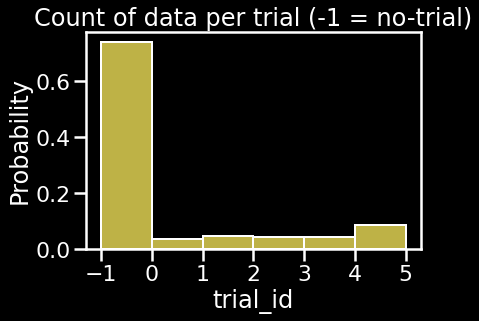

In [41]:
sea.histplot(data=df_eye, x='trial_id', bins=6, color=[255/255, 239/255, 94/255], stat='probability')
plt.xticks([-1, 0, 1, 2, 3, 4, 5])
plt.title('Count of data per trial (-1 = no-trial)')
ratio = 100 * sum(df_eye['trial_id'] < 0) / len(df_eye)
print(rf'{ratio}% of data is out of trials')

Around 73% of data is outside a trial, this happens because sometimes the ladies that recorded kept
the system running so that's a lotta useless data, let's check if the amount of data we have regardless
is around the duration of each trial.

In [7]:
# continue with a snapshot without no-trial data
df_trials = df_eye[df_eye['trial_id'] >= 0].copy()
df_trials.head()

,time_start,time_end,x_start,y_start,x_end,y_end,distance,duration,velocity1,velocity2,var0,var1,var2,type,subject,trial_id,x0_resized,y0_resized,roi
502,499.08,499.15,14.741,20.455,17.629,19.810,6.1975,0.067985,62.559,24.93500,0.0,0,0,1,1,0,589,343,3
503,499.31,499.35,25.169,19.863,25.150,19.771,3.0386,0.036016,47.371,1.50220,0.0,0,0,1,1,0,1006,364,1
504,499.51,499.55,31.473,20.092,31.425,20.097,10.3410,0.035996,80.951,0.75748,0.0,0,0,1,1,0,1258,356,4
505,499.75,499.78,13.953,18.468,14.040,18.481,1.9440,0.032004,30.381,1.56610,0.0,0,0,1,1,0,558,415,3
506,499.91,499.98,17.745,17.985,20.081,18.181,3.2285,0.068003,33.598,19.74700,0.0,0,0,1,1,0,709,432,3


#### Check if events sum around 17 seconds
The subjects watched a video for 17 seconds, so that should be the sum
of saccades + fixations + smooth-pursuit + blinks. We don't have blink events
so let's say vaguely around 12-18 seconds is OK with a margin of healthy error.

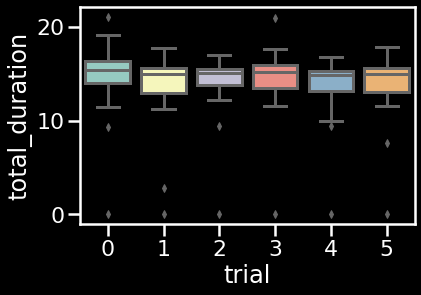

Something wrong with subject 0 at trial 0 total duration is 0.0
Something wrong with subject 0 at trial 1 total duration is 0.0
Something wrong with subject 0 at trial 2 total duration is 0.0
Something wrong with subject 0 at trial 3 total duration is 0.0
Something wrong with subject 0 at trial 4 total duration is 0.0
Something wrong with subject 0 at trial 5 total duration is 0.0
Something wrong with subject 2 at trial 0 total duration is 21.051814
Something wrong with subject 2 at trial 3 total duration is 20.889698
Something wrong with subject 4 at trial 4 total duration is 11.33681
Something wrong with subject 7 at trial 1 total duration is 2.799598
Something wrong with subject 7 at trial 2 total duration is 9.420709
Something wrong with subject 7 at trial 3 total duration is 11.574431999999998
Something wrong with subject 7 at trial 4 total duration is 9.947346
Something wrong with subject 7 at trial 5 total duration is 7.626331
Something wrong with subject 8 at trial 0 total dura

In [8]:
container_duration = []
subjects = df_trials['subject'].max()
trials = df_trials['trial_id'].max()

for subject in range(subjects + 1):
    for trial in range(trials + 1):
        duration = df_trials[(df_trials['subject'] == subject) & (df_trials['trial_id'] == trial)]['duration'].sum()
        container_duration.append((subject, trial, duration))

df_durations = pd.DataFrame(container_duration, columns=['subject', 'trial', 'total_duration'])

sea.boxplot(data=df_durations, x='trial', y='total_duration')
plt.show()

for subject, trial, duration in zip(df_durations['subject'], df_durations['trial'], df_durations['total_duration']):
    if not (12 < duration < 18):
        print(f'Something wrong with subject {subject} at trial {trial} total duration is {duration}')

All subjects have healthy durations per trials EXCEPT $(subject_{0}, subject_{7})$ which has zero duration of events,
we exclude those guys. Other guys with just one shitty trial we leave them ruin our dataset, as it's
a bit of error we can (and should!) dilute with good data.

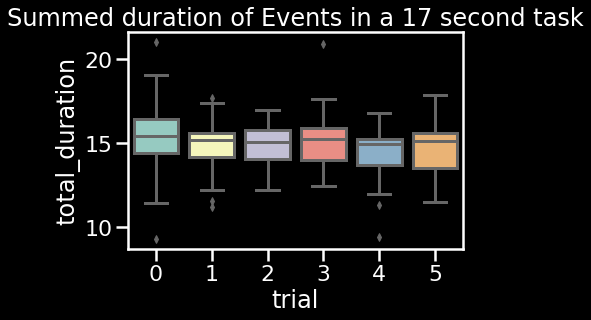

In [48]:
sea.boxplot(data=df_durations[~df_durations['subject'].isin([0, 7])], x='trial', y='total_duration')
plt.title('Summed duration of Events in a 17 second task')
plt.show()

In [10]:
# continue with a snapshot without 'those guys'
df_excluded = df_trials[~df_trials['subject'].isin([0, 7])].copy()
df_excluded.head()

,time_start,time_end,x_start,y_start,x_end,y_end,distance,duration,velocity1,velocity2,var0,var1,var2,type,subject,trial_id,x0_resized,y0_resized,roi
502,499.08,499.15,14.741,20.455,17.629,19.810,6.1975,0.067985,62.559,24.93500,0.0,0,0,1,1,0,589,343,3
503,499.31,499.35,25.169,19.863,25.150,19.771,3.0386,0.036016,47.371,1.50220,0.0,0,0,1,1,0,1006,364,1
504,499.51,499.55,31.473,20.092,31.425,20.097,10.3410,0.035996,80.951,0.75748,0.0,0,0,1,1,0,1258,356,4
505,499.75,499.78,13.953,18.468,14.040,18.481,1.9440,0.032004,30.381,1.56610,0.0,0,0,1,1,0,558,415,3
506,499.91,499.98,17.745,17.985,20.081,18.181,3.2285,0.068003,33.598,19.74700,0.0,0,0,1,1,0,709,432,3


#### 'type' event behaviour
We separate events in fixations, saccades and smooth-pursuits. These events are widely studied
in the field of vision and thus their behaviour should quantify as expected.

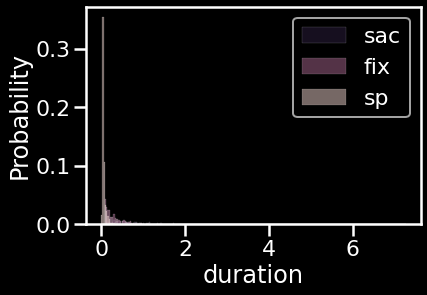

In [42]:
sea.histplot(data=df_excluded, x='duration', hue='type', stat='probability')
plt.legend(['sac', 'fix', 'sp'])
plt.show()

Alas, we have some outliers in event durations. Let's check out which events can last longer than
3 seconds or lower than 1/60 seconds (fps = 30), as that would be weird (but maybe not incorrect)
for any event.

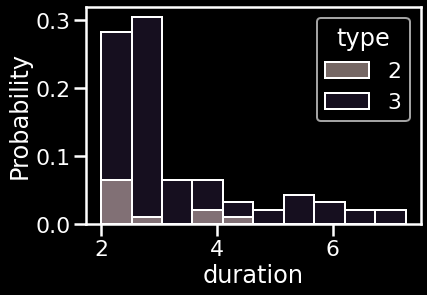

In [43]:
# check long events
sea.histplot(data=df_excluded[df_excluded['duration'] > 2], x='duration', hue='type',
             stat='probability')
plt.show()

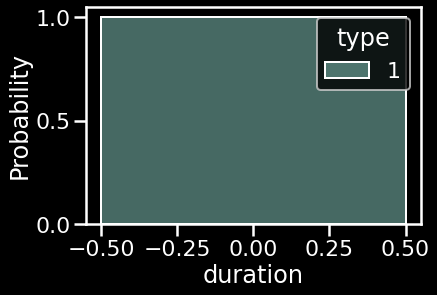

In [45]:
# check short events
sea.histplot(data=df_excluded[df_excluded['duration'] < 1/60], x='duration', hue='type',
             stat='probability')
plt.show()

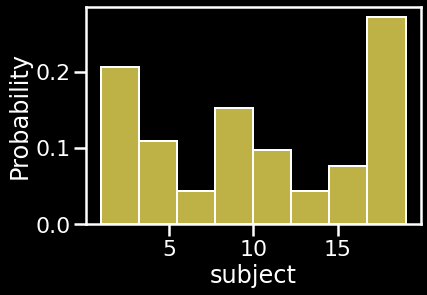

In [46]:
# check long weird events per subject
sea.histplot(data=df_excluded[df_excluded['duration'] > 2], x='subject',
             stat='probability', color=[255/255, 239/255, 94/255])
plt.show()

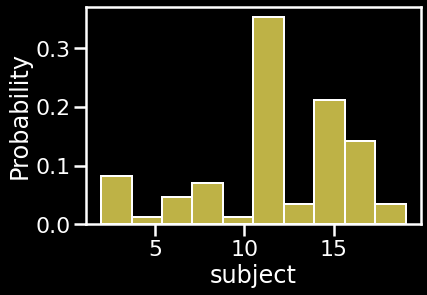

In [47]:
# check short weird events per subject
sea.histplot(data=df_excluded[df_excluded['duration'] < 1/60], x='subject',
             stat='probability', color=[255/255, 239/255, 94/255])
plt.show()

Most events longer than 3 seconds are smooth-pursuits (with some fixations here and there),
__all__ short events are saccades which make sense, but there are some saccades that are 0.0 seconds
and that could make some problems (like calculating velocity) but this is a limitation of the hardware
used. Also, we could say these _weird behaviours_ are present in all subjects so there's nothing
to exclude here.

#### Validating RoI behaviour
(TODO): make some RoI graphs

### Describing visual behaviour during task
Does visual behaviour described through our gaze events change over iterative
tasks or do they stay the same?

(TODO): make some graphs

### Accelerometer Data <a name="dataset_acc"></a>
TODO: We need some graphs to describe behaviour.